# Introduction:
Gradient descent is an optimization algorithm often used for finding the weights or coefficients of machine learning algorithms, such as artificial neural networks and logistic regression.

It works by having the model make predictions on training data and using the error on the predictions to update the model in such a way as to reduce the error.

The goal of the algorithm is to find model parameters (e.g. coefficients or weights) that minimize the error of the model on the training dataset. It does this by making changes to the model that move it along a gradient or slope of errors down toward a minimum error value. This gives the algorithm its name of “gradient descent.”


## Batch Gradient Descent:
Batch gradient descent is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.

## Stochastic GD : 
Stochastic gradient descent, often abbreviated SGD, is a variation of the gradient descent algorithm that calculates the error and updates the model for each example in the training dataset.

The update of the model for each training example means that stochastic gradient descent is often called an online machine learning algorithm.

## Mini-Batch Gradient Descent
Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

Implementations may choose to sum the gradient over the mini-batch which further reduces the variance of the gradient.

Mini-batch gradient descent seeks to find a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent. It is the most common implementation of gradient descent used in the field of deep learning.

More [here](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)

We can implement the 3 variants by varying the batch size. for example, if we divide data into one batch and apply Gradient Descent. then, we are implementing Batch GD. if we divide data into several batches. then, we are implementing Mini-Batch GD. if we divide data into batches equal to number of data points, then, we are implementing stochastic GD.

In this implementation:
- we use gradient descent to optimize paramters of linear regression model which is trying to fit a line to number of data points.

### Importing Packages:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

### Preparing Data:

In [3]:
# Input data
x_points = np.arange(20)
# Actual output
y_points = -2 * x_points + 1
y_points = y_points.reshape(20,1)

In [4]:
# Constructing input matrix: 
# y = theta0*x0 + theta1*x1
# x0 = vector of ones , x1 = vector of input data
x0 = np.ones_like(x_points)

x_matrix = np.array([x0, x_points]).T
x_matrix.shape

(20, 2)

Text(0.5, 1.0, 'Data Points')

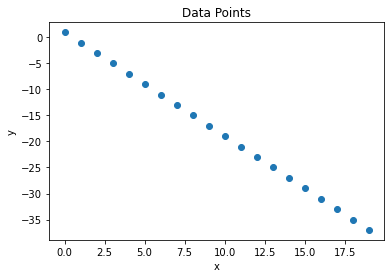

In [5]:
# Exploring Data Points:
plt.scatter(x_points, y_points);
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points")

### Used Functions:

In [6]:
# return the MSE between actual and predicted output
def loss(predicted, actual=y_points):
    diff = predicted - actual
    return (1/(2*len(actual))) * (norm(diff, 2))**2

In [7]:
# return jacobian vector
def jacob_single(hx, y=y_points, x=x_matrix):
    return ((1 / hx.shape[0]) * ((hx - y).T @ x)).T

### General Gradient Descent Function:

In [8]:
def gradientDescent(x, y, alpha, b, n):
    """
    Description:
    Apply gradient descent (with 3 GD variants) to optimize parameters of Single Variable Linear Regression Model 
    
    Args:
    x : input matrix
    y : actual output
    alpha : learning rate
    b : Number of Batches: = 1 : Batch GD, = length of dataPoints : Stochastic GD
    
    Returns:
    j(int) : Number of iterations
    p(array) : vector of final updated parameters
    mean_sq_error(list) : list of MSE after each epoch
    parameters(list) : list of updated parameters after each epoch
    Hx(list) :list contains predicted output after each epoch
    """
    # initial guess of parameters:
    p = np.array([[0],[0]])
    # Predicted points based on initial parameters
    hx = x @ p
    # Divide data into mini-batches based on input b:
    x_batches = np.split(x, b)
    y_batches = np.split(y, b)
    # Initializing List to contain MSE after each Epoch
    mean_sq_error = []
    # Initializing list to contain updated paramters after each epoch:
    parameters = []
    # Initializing list of Predicted output after each epoch
    Hx = []
    # hold Number of iterations
    j = 0
    while(norm(jacob_single(hx, y, x), 2)) > 0.01 and j < n:
        for i in range(len(x_batches)):
            hx = x_batches[i] @ p
            
            updated_p = p -  alpha * jacob_single(hx, y_batches[i], x_batches[i])

            p = updated_p
        
        # Updated predicted points after each Epoch
        hx = x_matrix @ updated_p
        
        # Appending some results to evaluate training:
        Hx.append(hx)
        parameters.append(updated_p)
        mean_sq_error.append(loss(hx))
    
        # Increment counter of iterations
        j += 1
        
    return j, p, mean_sq_error, parameters, Hx

In [9]:
# Calling gradientDescent function:
j, p, mse, parameters, Hx = gradientDescent(x_matrix, y_points, alpha=0.01, b=20, n=15000)

In [10]:
print("Number of Epochs:", j)

Number of Epochs: 166


### Loss over Epochs:

Text(0, 0.5, 'MSE')

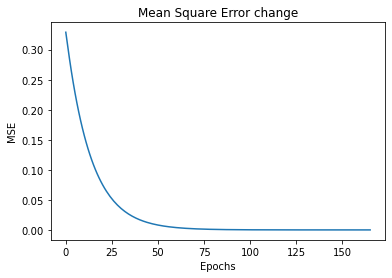

In [11]:
# MSE vs epochs
plt.plot(mse)
plt.title("Mean Square Error change")
plt.xlabel("Epochs")
plt.ylabel("MSE")

### Paramters updates over Epochs:

In [12]:
theta0 = []
theta1 = []
for p in parameters:
    theta0.append(p[0])
    theta1.append(p[1])

Text(0, 0.5, 'theta0')

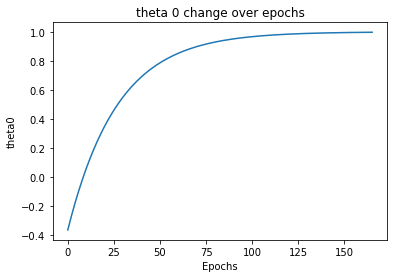

In [13]:
plt.plot(theta0)
plt.title("theta 0 change over epochs")
plt.xlabel("Epochs")
plt.ylabel("theta0")

Text(0, 0.5, 'theta1')

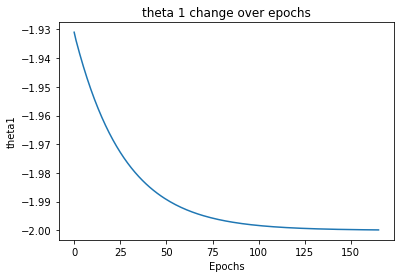

In [14]:
plt.plot(theta1)
plt.title("theta 1 change over epochs")
plt.xlabel("Epochs")
plt.ylabel("theta1")

### Loss vs Parameters:

Text(0, 0.5, 'MSE')

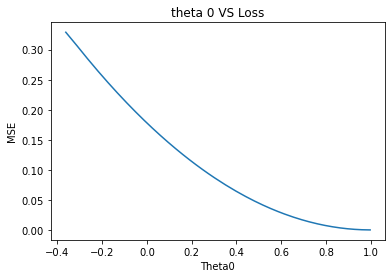

In [15]:
plt.plot(theta0, mse)
plt.title("theta 0 VS Loss")
plt.xlabel("Theta0")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

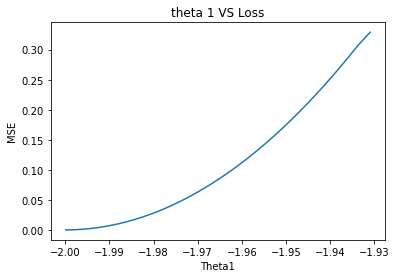

In [16]:
plt.plot(theta1, mse)
plt.title("theta 1 VS Loss")
plt.xlabel("Theta1")
plt.ylabel("MSE")

### Regression line over Epochs:

Text(0.5, 1.0, 'Data Points vs Predicted Regression line')

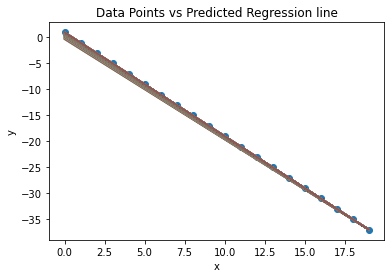

In [17]:
plt.scatter(x_points, y_points);

for hx in Hx:
    plt.plot(x_points, hx);
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points vs Predicted Regression line")

### Final Results:

In [18]:
from sklearn.metrics import r2_score

y_predicted = x_matrix @ p

r2_score(y_points, y_predicted)

0.999999976158669

Text(0.5, 1.0, 'Data Points vs Final Predicted Regression line')

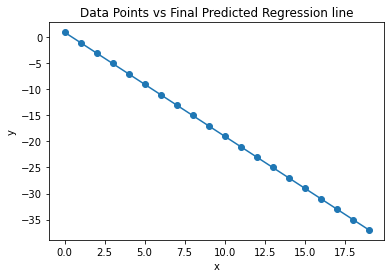

In [19]:
# Plotting Final regression line vs actual data
plt.scatter(x_points, y_points);
plt.plot(x_points, y_predicted)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points vs Final Predicted Regression line")